# Business Problem
- Perform Clustering for the crime data and identify the number of clusters formed and draw inferences

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.rename(columns={'Unnamed: 0': 'City'},inplace=True)

In [ ]:
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.shape

(50, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
df.isna().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

**There is no NA values present in data**

In [ ]:
df.duplicated().value_counts()

False    50
dtype: int64

**There is no duplicated values present in data**

In [ ]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# **Scaling the data**

In [ ]:
# Normalization Function
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
df1=scaler.fit_transform(df.iloc[:,1:])
df1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Find optimal number of cluster



In [ ]:
# Finding optimal numbers of clusters
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-1.18518939, -1.22267902, -1.13101714, -1.16102738],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482],
       [-0.33737388, -0.41648447, -0.08886231, -0.22993346],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [ ]:
kmeans.labels_

array([0, 4, 4, 3, 4, 4, 2, 3, 4, 0, 2, 1, 4, 3, 1, 3, 3, 0, 1, 4, 2, 4,
       3, 0, 4, 3, 3, 4, 1, 2, 4, 4, 0, 1, 3, 3, 3, 3, 2, 0, 1, 0, 4, 2,
       1, 3, 3, 1, 1, 3], dtype=int32)

# **Cheacking the performance** 
- **Inertia**

cluster size: 1 , WCSS:  200.00000000000003
cluster size: 2 , WCSS:  104.96163315756871
cluster size: 3 , WCSS:  80.0888613219962
cluster size: 4 , WCSS:  57.55425863091105
cluster size: 5 , WCSS:  50.52026552535068
cluster size: 6 , WCSS:  43.927464044975736
cluster size: 7 , WCSS:  40.52183461131976
cluster size: 8 , WCSS:  34.68738839784909
cluster size: 9 , WCSS:  32.70648136388185


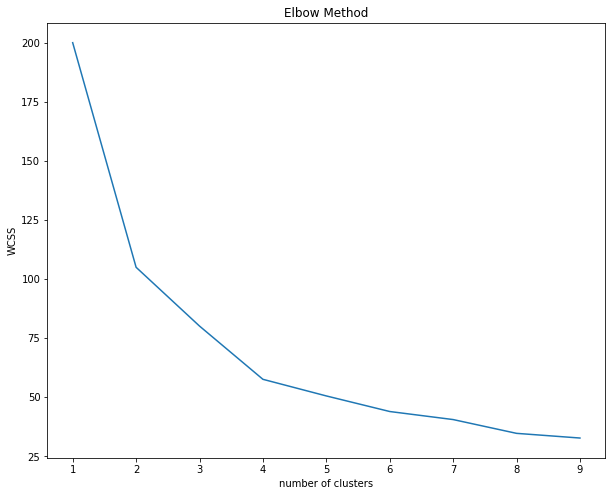

In [ ]:
# Euclidean Distance
plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)
  print("cluster size:",i,", WCSS: " , kmeans.inertia_)

plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans.inertia_ #within a sum of square

50.52026552535068

# Silhouette_score

In [ ]:
from sklearn import metrics

In [ ]:
metrics.silhouette_score(df1, kmeans.labels_,metric='euclidean')

0.2518939934580804

# Building cluster algorithm

In [ ]:
cluster_new = KMeans(4, random_state=40)
cluster_new.fit(df1)

KMeans(n_clusters=4, random_state=40)

In [ ]:
cluster_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [ ]:
cluster_new.n_iter_

3

In [ ]:
cluster_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [ ]:
# Assing cluster to dataset
df["Clusterid_KMeans"] = cluster_new.labels_
df.head()

,City,Murder,Assault,UrbanPop,Rape,Clusterid_KMeans
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


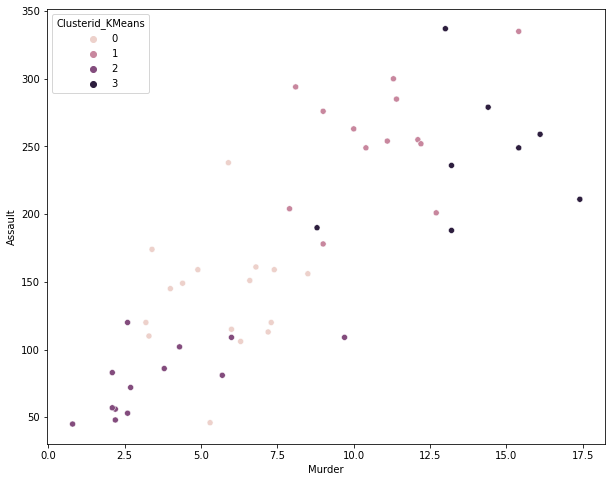

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Murder", y="Assault", hue="Clusterid_KMeans" )
plt.show()

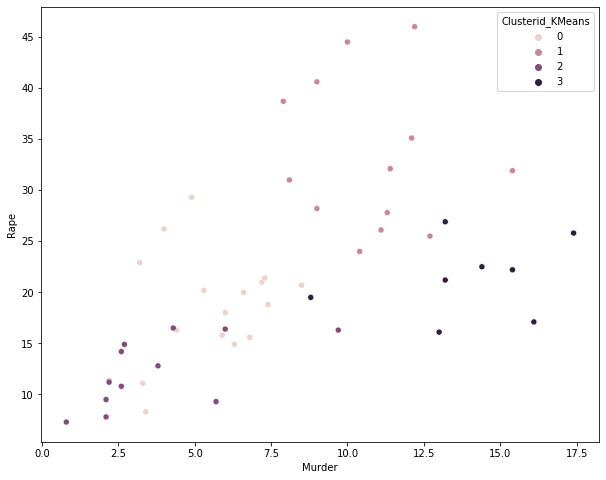

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Murder", y="Rape", hue="Clusterid_KMeans" )
plt.show()

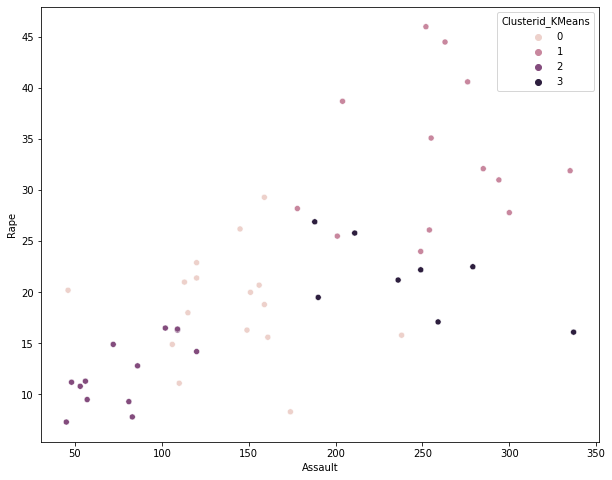

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Assault", y="Rape", hue="Clusterid_KMeans" )
plt.show()

# Conclusion 
- As we can see our intial value is 50.52 which means k=point is 5 
- Our silheoette score is only 25% that means our cluster groups are not highly dens
- as we have taken only four clusters that was 0,1,2,3, which show relationships with variables are == **Muder**, **Assalt** and **Rape**
- where **Muder** and **Assut** has stong relation